# 运动模式

In [1]:
import numpy as np
from scipy.optimize import fsolve
%matplotlib inline
import matplotlib.pyplot as plt
def position(x):
    n = len(x)
    e = np.zeros(n) #n个平衡方程
    for i in range(1,n-1):
        for j in range(0,i):
            e[i] = e[i] - 1/(x[i]-x[j])**2
        for k in range(i+1,n):
            e[i] = e[i] + 1/(x[i]-x[k])**2
        e[i] = e[i] + x[i]
    for i in range(1,n):
        e[0] = e[0] + 1/(x[0]-x[i])**2
    e[0] = e[0] + x[0]
    for i in range(0,n-1):
        e[n-1] = e[n-1] - 1/(x[n-1]-x[i])**2
    e[n-1] = e[n-1] + x[n-1]    
    return(np.array(e))
result = fsolve(position, [0,1,2,3])
print(result)

[-1.43680199 -0.45437928  0.45437928  1.43680199]


In [2]:
# 求解径向频率分布
def Frequence_rr(n,m1,m2,b,b1,b2):  # b为w_r/w_z
#     A_z = np.zeros((n,n)) #展开矩阵
    A_r = np.zeros((n,n))
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
#                 A_z[i][j] = -2/abs(u[i]-u[j])**3
#                 A_z[i][i] = A_z[i][i] + 2/abs(u[i]-u[j])**3
                A_r[i][j] = 1/abs(u[i]-u[j])**3
                A_r[i][i] = A_r[i][i] - 1/abs(u[i]-u[j])**3
#         A_z[i][i] = A_z[i][i] + 1
        A_r[i][i] = A_r[i][i] + b**2
#     A_z[m1][m1] = A_z[m1][m1] + b1**2
    A_r[m1][m1] = A_r[m1][m1] + b1**2 
#     A_z[m2][m2] = A_z[m2][m2] + b3**2
    A_r[m2][m2] = A_r[m2][m2] + b2**2 
#     a_z,b_z = np.linalg.eig(A_z)
    a_r,b_r = np.linalg.eig(A_r)
    return a_r,b_r


# Dipole Trap 估算

In [3]:
from sympy import *
init_printing()
from scipy.constants import c as c0
from scipy.constants import m_p
from scipy.constants import hbar as h

m,c,omega0,Gamma,Delta,delta, I, w0,hbar,wavelen,w,P = symbols('m, c, \omega_0, \Gamma,\Delta,\delta, I, w_0,\hbar,\lambda,w,P ')
# omega0, 共振角频率
# w0     激光的半峰宽

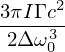

In [53]:
U_dip = 3*pi*c**2*Gamma*I/(2*omega0**3*Delta)
U_dip

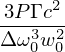

In [54]:
I_0 = 2*P/(pi*w0**2)
U_0 = U_dip.subs({I:I_0})
U_0

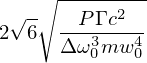

In [15]:
W_z = sqrt(4*U_0/(m*w0**2))
W_z

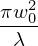

In [16]:
Z_R = pi*(w0)**2/wavelen
Z_R

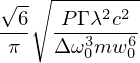

In [55]:
W_x = sqrt(2*U_0/(m*Z_R**2))# 梯度势阱，提供tailor的trap 
W_x

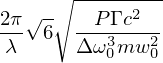

In [56]:
W_k = 2*pi/wavelen*sqrt(2*U_0/(m)) # 驻波势阱，提供自旋依赖力  
W_k

In [57]:
paras={
    Gamma: 20e6*2*pi,
    omega0: 2*pi*c/(0.369e-6),
    Delta: 2*pi*200e9,
    w0:    0.5e-6,
    m:     171*m_p,
    P:     1e-3,
    delta: 2*pi*12.6e9,
    c:  c0,
    wavelen: (0.369e-6),
    delta: 2*pi*12.6e9,
    hbar: h
}

V_k = N(W_k.subs(paras)/(2*pi))
print(V_k/1e6)

V_x = N(W_x.subs(paras)/(2*pi))
print(V_x/1e6)

V_z = N(W_z.subs(paras)/(2*pi))
print(V_z/1e6)

Z_r = N((Z_R/w0).subs(paras))
print(Z_r)

6.45270343683483
0.178042911743431
1.51582196085881
4.25690061462032


In [61]:
c_lamb = 2*(2*pi/wavelen)*sqrt(hbar/(2*m))
c_lamb = float(N(c_lamb.subs(paras)))
c_lamb
## yeta = c_lamb/sqrt(w)

In [66]:
# omega_j = U_0 * delta/(2*Delta*hbar) 
omega_j = 2 * U_0 * delta * (2*(2*pi/wavelen)*sqrt(hbar/(2*m*W_k)))**2 /(Delta*hbar)
c_rabi = simplify( omega_j/ W_k )
c_rabi = float(N(c_rabi.subs(paras)))
c_rabi 
## omega_j =  c_rabi* w_k  

In [32]:
# c_rabi = omega_j/W_x**2
# ## Rabi = c_rabi * W_x**2
# c_rabi = float(N(c_rabi.subs(paras)))
# c_rabi

In [14]:
c_optic = W_x/sqrt(P)
c_optic = float(N(c_optic.subs(paras)))
c_optic 

In [15]:
from scipy import integrate
import math
import numpy as np

# 积分

In [34]:
def f1(w,u,t1,t2,p):
    x = 0
    x = x - (u + w) * np.sin(p + t1 * (u - w))
    x = x + (u + w) * np.sin(p + t2 * (u - w))
    x = x + (u - w) * np.sin(p + t1 * (u + w))
    x = x - (u - w) * np.sin(p + t2 * (u + w))
    return 1/(2 * (u - w)*(u + w)) * x
# x 方向displacement要用的积分

In [35]:
def f2(w,u,t1,t2,p):
    x = 0
    x = x + (u + w) * np.cos(p + t1 * (u - w))
    x = x - (u + w) * np.cos(p + t2 * (u - w))
    x = x + (u - w) * np.cos(p + t1 * (u + w))
    x = x - (u - w) * np.cos(p + t2 * (u + w))
    return 1/(2 * (u - w) * (u + w)) * x
# p 方向displacement要用的积分
f2(1,2,2,1.3,0.5)+f2(1,2,1.3,1,0.5)-f2(1,2,2,1,0.5)

In [36]:
def f3(w,u,t1,t2,p):
    x = 0
    x = x - w * (u + w) * (np.cos(p + t1*(u-w)) - np.cos(p + t2*(u-w))) * np.sin(p)
    x = x - w * (u - w) * (np.cos(p + t1*(u+w)) - np.cos(p + t2*(u+w))) * np.sin(p)
    x = x + u * (u + w) * (np.sin(p + t1*(u-w)) - np.sin(p + t2*(u-w))) * np.cos(p)
    x = x - u * (u - w) * (np.sin(p + t1*(u+w)) - np.sin(p + t2*(u+w))) * np.cos(p)
    x = x - (u - w) * (u + w) * w * (t1 - t2)
    x = x + (u - w) * (u + w) * w * (np.sin(2*(p + t1*u)) - np.sin(2*(p + t2*u)))/(2*u)
    return 1/(2 *  (u - w)**2 * (u + w)**2) * x
# 积累出的相位要用的积分    


# Coupling

In [37]:
def Coupling(n,n1,n2,b,w1,w2): #n1,n2 为加上激光的离子，n为离子总数,返回耦合系数，解出的频率本征值，频率本征态
    g = np.zeros((2,n))
    b1 = w1/(2*np.pi*1e5)
    b2 = w2/(2*np.pi*1e5)
    F = Frequence_rr(n,n1,n2,b,b1,b2)
    w_r = np.sqrt(F[0])*2*np.pi*1e5 
    b_r = F[1].T
    for i in range(0,n): ##第i个模式与第n1,n2个离子耦合
        g[0][i] = c_lamb * b_r[i][n1] / np.sqrt(w_r[i])
        g[1][i] = c_lamb * b_r[i][n2] / np.sqrt(w_r[i])
    return g,w_r,b_r

# Displacement

In [38]:
def Displace(g,w_r,t_list,phi_list,u): # tao为门时间，u为激光之间失谐, 返回失谐模平方
    n = len(w_r)
    m = len(phi_list)
    a = np.zeros((2,n))
    for i in range(0,n):
        jf1 = 0
        jf2 = 0
        for j in range(0,m): 
            jf1 = jf1 + f1(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
            jf2 = jf2 + f2(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
        a[0][i] = g[0][i]**2 * (jf1**2 + jf2**2)
        a[1][i] = g[1][i]**2 * (jf1**2 + jf2**2)
    return a

# Phi

In [39]:
def Phi(g,w_r,t_list,phi_list,u):
    n = len(w_r)
    m = len(phi_list)
    phi = 0
    for i in range(0,n):
        jf = 0
        for j in range(0,m):
            jf  = jf + f3(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
        phi = phi + 2*g[0][i]*g[1][i]*jf
    return phi

In [40]:
def Fie(n,n1,n2,b,para,tao,Np,u): #计算严格求解的非保真度，在考虑局域势的效益下，para是所有参数，tao是总时间，u是失谐，Np是门之前剩余热分布
    w1 = para[0]*1e6
    w2 = para[1]*1e6
#     t_list = [0,para[2]*1e-6,para[3]*1e-6,para[4]*1e-6,para[5]*1e-6,tao]
    t_list = (np.array(np.concatenate(([0],para[2:6],[tao])))*1e-6).tolist()
    phi_list = para[6:11]
    C = Coupling(n,n1,n2,b,w1,w2)
    b_r = C[2]
    omega_1 = c_rabi * w1
    omega_2 = c_rabi * w2 
    D = Displace(C[0],C[1],t_list,phi_list,u)[0]*omega_1**2+Displace(C[0],C[1],t_list,phi_list,u)[1]*omega_2**2
    P = Phi(C[0],C[1],t_list,phi_list,u)*omega_1*omega_2
    F = 1/3 * abs(np.sin(2*P)) + 1/2
    for i in range(0,n):
          F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])    
#         F = F + 4/3 * (1/2 + Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2) * D[i]
    return F,P,D,C[1]

In [92]:
fre = [10,10] # w (MHz)
t_list = [0.3,1,1.6,7] # us
phi_list = [0,0,0,0,0]
u = 10.3e6
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list)))) #参数设置，有光频，分段时间和失谐
Fie(10,4,5,5,x0,15,np.ones(10),u)
# from scipy.optimize import minimize
# res = minimize(lambda x: np.abs(np.cos(2*FIED_3(10,4,5,5,x,2.5,np.ones(10),u)[1]))**2+sum(FIED_3(10,4,5,5,x,2.5,np.ones(10),u)[2]),x0,tol=1e-7)
# print(res.success)
# print(res.x)
# print(Fie(10,4,5,5,res.x,2.5,np.ones(10),u)[1],Fie(10,4,5,5,res.x,2.5,np.ones(10),u)[2])
# print(Fie(10,4,5,5,res.x,2.5,np.ones(10),u)[0])

(0.9666455432492606,
 0.7910270726901696,
 array([1.74852388e+00, 1.09129199e+00, 1.47070181e-08, 9.60930858e-09,
        5.70645398e-08, 2.79665904e-08, 3.31117906e-07, 1.61898972e-07,
        8.39183714e-07, 5.25468376e-07]),
 array([10348460.61514171, 10132746.8350216 ,  1879922.5122679 ,
         1888430.69078824,  3080936.20177549,  3072961.19989346,
         2851733.12386543,  2841957.07807342,  2479559.17748527,
         2470054.68551751]))

In [93]:
def traject(n,n1,n2,b,para,tao,t,Np,u):
    w1 = para[0]*1e6
    w2 = para[1]*1e6
    t = t * 1e-6
    t_list = (np.array(np.concatenate(([0],para[2:6],[tao])))*1e-6).tolist()
    phi_list = para[6:11]
    C = Coupling(n,n1,n2,b,w1,w2)
    g = C[0]
    w_r = C[1]
    omega_1 = c_rabi*w1**2
    omega_2 = c_rabi*w2**2 
    a = np.zeros((4,n))
    b = np.zeros((2,n))
    d = np.zeros(n)
    pos = 0
    while (t >= t_list[pos]):
        pos = pos+1
    for i in range(0,n):
        jf_x = 0
        jf_y = 0
        for j in range(0,pos-1): 
            jf_x = jf_x + f1(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
            jf_y = jf_y + f2(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
        jf_x = jf_x + f1(w_r[i],u,t,t_list[pos-1],phi_list[pos-1])
        jf_y = jf_y + f2(w_r[i],u,t,t_list[pos-1],phi_list[pos-1])
        a[0][i] = g[0][i] * jf_x * omega_1 # 第一个离子第i个模式x方向位移
        a[1][i] = g[0][i] * jf_y * omega_1
        a[2][i] = g[1][i] * jf_x * omega_2
        a[3][i] = g[1][i] * jf_y * omega_2
    return a


In [94]:
X = x0
Np = np.ones(10)
T = np.linspace(0,14.99999,1000)
pos1_x = np.zeros((10,1000))
pos1_y = np.zeros((10,1000))
pos2_x = np.zeros((10,1000))
pos2_y = np.zeros((10,1000))
for i in range(10): # 第i个模式时刻t的坐标
    for j,t in enumerate(T):
        pos1_x[i][j] = traject(10,4,5,5,X,15,t,Np,u)[0][i]
        pos1_y[i][j] = traject(10,4,5,5,X,15,t,Np,u)[1][i]
        pos2_x[i][j] = traject(10,4,5,5,X,15,t,Np,u)[2][i]
        pos2_y[i][j] = traject(10,4,5,5,X,15,t,Np,u)[3][i]

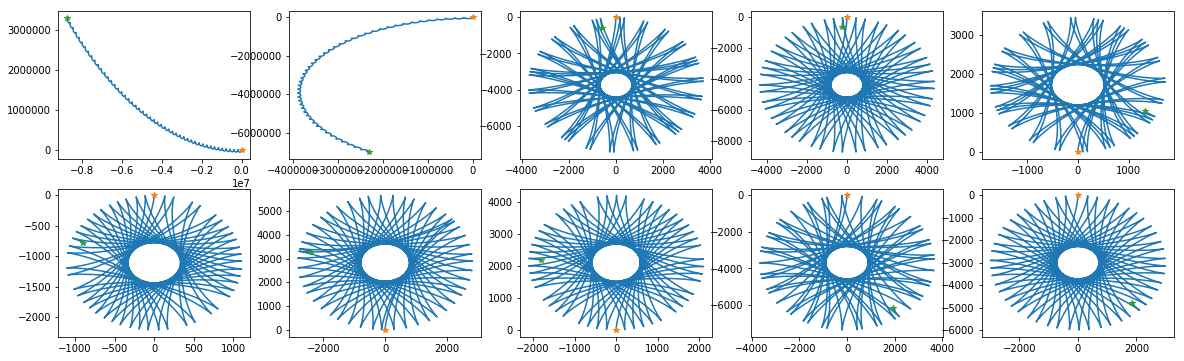

In [95]:
plt.figure(figsize=(20,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(pos1_x[i],pos1_y[i])
    plt.plot(pos1_x[i][0],pos1_y[i][0],'*')
    plt.plot(pos1_x[i][999],pos1_y[i][999],'*')

In [161]:
solve = res.x 
print(solve)

[10.83011707 10.83010406  0.48257977  1.04124133  1.46614066  1.8992043
  3.31971424  0.93100021  5.56102483  6.14371121  3.11481263]


Text(0.5, 0, 'detuning (10KHz)')

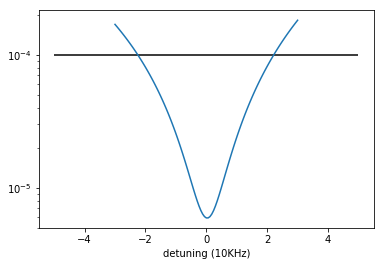

In [168]:
U = np.linspace(-3,3,101) #1KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u*1e4
    fie[i] = 1-Fie(10,4,5,5,solve,2.5,np.ones(10),11e6+u)[0]
plt.semilogy(U,fie)
plt.hlines(1e-4,-5,5)
plt.xlabel('detuning (10KHz)')
# plt.ylabel('gate error $10^{-3}$')

In [230]:
fre = [10,10] # w (MHz)
t_list = [0.3,0.96,2.22,2.5] # us
phi_list = [3,1,3,4,1]
u = 10.23e6
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list)))) #参数设置，有光频，分段时间和失谐
res = minimize(lambda x: np.abs(np.cos(2*Fie(10,4,5,5,x,2.8,np.ones(10),u)[1]))**2+sum(Fie(10,4,5,5,x,2.8,np.ones(10),u)[2]),x0,tol=1e-7)
print(res.success)
print(res.x)
print(Fie(10,4,5,5,res.x,2.8,np.ones(10),u)[1],Fie(10,4,5,5,res.x,2.8,np.ones(10),u)[2])
print(Fie(10,4,5,5,res.x,2.8,np.ones(10),u)[0])

# Fie(10,4,5,5,x0,2.8,np.ones(10),u)[1]

False
[ 9.71598361  9.71649533  0.34374406  1.00134541  1.61781429  2.43785322
  1.44833887 -1.84180063  1.37203419  4.64686217  1.46616089]
0.7853978971552931 [9.08909506e-11 5.91512047e-11 1.56672557e-07 1.74457346e-07
 1.06190792e-06 4.05485858e-07 3.88673454e-08 1.26106344e-08
 1.07622263e-06 7.22643280e-07]
0.999999998768845


In [231]:
Solve = res.x 
print(Solve)

[ 9.71598361  9.71649533  0.34374406  1.00134541  1.61781429  2.43785322
  1.44833887 -1.84180063  1.37203419  4.64686217  1.46616089]


Text(0.5, 0, 'detuning (10KHz)')

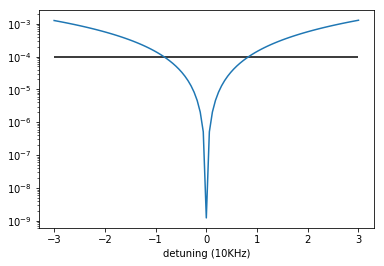

In [232]:
U = np.linspace(-3,3,101) #1KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u*1e4
    fie[i] = 1-Fie(10,4,5,5,Solve,2.8,np.ones(10),10.23e6+u)[0]
plt.semilogy(U,fie)
plt.hlines(1e-4,-3,3)
plt.xlabel('detuning (10KHz)')
# plt.ylabel('gate error $10^{-3}$')

In [220]:
np.pi/4

In [202]:
fre = [f,f] # w (MHz)
t_list = [1,2,3,6] # us
phi_list = [1,1,1,1,1]
u = 3.89e6
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))
# # # x0 =  np.asarray((np.concatenate((fre,t_list,phi_list)))) #参数设置，有光频，分段时间和失谐
# res = minimize(lambda x: np.abs(np.cos(2*Fie(10,4,5,5,x,7,np.ones(10),u)[1]))**2+sum(Fie(10,4,5,5,x,7,np.ones(10),u)[2]),x0,tol=1e-7)
# print(res.success)
# print(res.x)
# print(Fie(10,4,5,5,res.x,7,np.ones(10),u)[1],Fie(10,4,5,5,res.x,7,np.ones(10),u)[2])
# print(Fie(10,4,5,5,res.x,7,np.ones(10),u)[0])
Fie(10,4,5,5,x0,7,np.ones(10),u)[1]

# 轨迹

In [178]:
def traject(n,n1,n2,b,para,tao,t,Np,u):
    w1 = para[0]*1e6
    w2 = para[1]*1e6
    t = t * 1e-6
    t_list = (np.array(np.concatenate(([0],para[2:6],[tao])))*1e-6).tolist()
    phi_list = para[6:11]
    C = Coupling(n,n1,n2,b,w1,w2)
    g = C[0]
    w_r = C[1]
    omega_1 = c_rabi*w1**2
    omega_2 = c_rabi*w2**2 
    a = np.zeros((4,n))
    b = np.zeros((2,n))
    d = np.zeros(n)
    pos = 0
    while (t >= t_list[pos]):
        pos = pos+1
    for i in range(0,n):
        jf_x = 0
        jf_y = 0
        for j in range(0,pos-1): 
            jf_x = jf_x + f1(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
            jf_y = jf_y + f2(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
        jf_x = jf_x + f1(w_r[i],u,t,t_list[pos-1],phi_list[pos-1])
        jf_y = jf_y + f2(w_r[i],u,t,t_list[pos-1],phi_list[pos-1])
        a[0][i] = g[0][i] * jf_x * omega_1 # 第一个离子第i个模式x方向位移
        a[1][i] = g[0][i] * jf_y * omega_1
        a[2][i] = g[1][i] * jf_x * omega_2
        a[3][i] = g[1][i] * jf_y * omega_2
    return a

In [181]:
X = solve
Np = np.ones(10)
u = 11e6
T = np.linspace(0,2.499999,1000)
pos1_x = np.zeros((10,1000))
pos1_y = np.zeros((10,1000))
pos2_x = np.zeros((10,1000))
pos2_y = np.zeros((10,1000))
for i in range(10): # 第i个模式时刻t的坐标
    for j,t in enumerate(T):
        pos1_x[i][j] = traject(10,4,5,5,X,2.5,t,Np,u)[0][i]
        pos1_y[i][j] = traject(10,4,5,5,X,2.5,t,Np,u)[1][i]
        pos2_x[i][j] = traject(10,4,5,5,X,2.5,t,Np,u)[2][i]
        pos2_y[i][j] = traject(10,4,5,5,X,2.5,t,Np,u)[3][i]

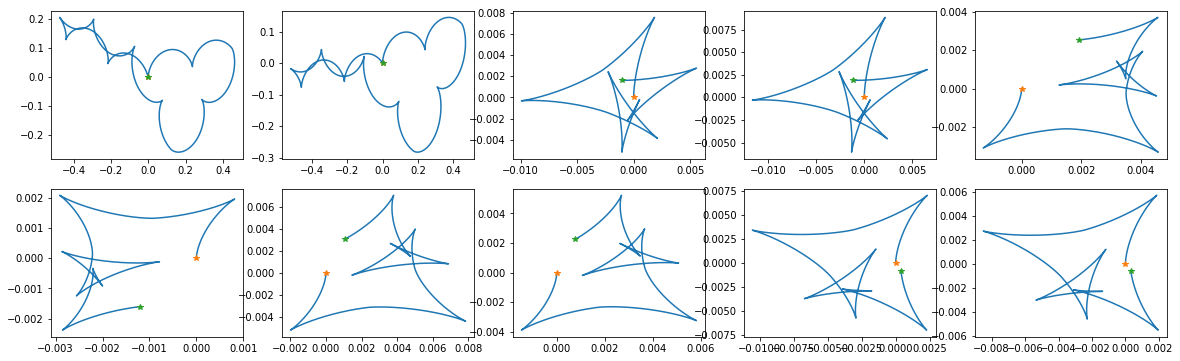

In [182]:
plt.figure(figsize=(20,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(pos1_x[i],pos1_y[i])
    plt.plot(pos1_x[i][0],pos1_y[i][0],'*')
    plt.plot(pos1_x[i][999],pos1_y[i][999],'*')

In [233]:
np.log2(3/5)*3/5+np.log2(2/5)*2/5

In [234]:
-1/3*(np.log2(3/5)*3/5+np.log2(2/5)*2/5+np.log2(3/5)*3/5+np.log2(2/5)*2/5+np.log2(4/5)*4/5+np.log2(1/5)*1/5)

In [235]:
1/3*0+2/3*(np.log2(3/5)*3/5+np.log2(2/5)*2/5)

In [236]:
9/15*(np.log2(1/3)*1/3+np.log2(2/3)*2/3)

In [238]:
1/3*(np.log2(1/5)*1/5+np.log2(4/5)*4/5)+6/15*(np.log2(2/3)*2/3+np.log2(1/3)*1/3)+0

In [241]:
0.971-0.888